In [1]:
from google.colab import drive
import pandas as pd

drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
df = pd.read_csv("/content/drive/MyDrive/Bootcamp IndonesiaAI/project1/output_list_attribute_tanh.csv")
df

,id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000051.jpg,1,-1,-1,1,1,-1,-1,1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,000052.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,-1,1,-1,-1,-1,-1,-1,-1,-1
2,000065.jpg,-1,-1,-1,-1,-1,-1,-1,-1,1,...,-1,1,1,-1,-1,-1,-1,-1,-1,1
3,000166.jpg,1,-1,-1,-1,-1,-1,-1,1,-1,...,1,-1,-1,-1,-1,1,-1,-1,-1,-1
4,000198.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,202320.jpg,-1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,1,-1,1,-1,-1,1,-1,-1,1
4996,202340.jpg,-1,-1,1,-1,-1,-1,-1,-1,1,...,-1,1,1,-1,-1,-1,1,-1,-1,1
4997,202347.jpg,-1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,1,-1,-1,1,-1,-1,1
4998,202357.jpg,-1,-1,1,-1,-1,-1,1,-1,-1,...,-1,-1,1,1,-1,-1,1,1,-1,1


In [3]:
filenames =  df["id"]
filenames

0       000051.jpg
1       000052.jpg
2       000065.jpg
3       000166.jpg
4       000198.jpg
           ...    
4995    202320.jpg
4996    202340.jpg
4997    202347.jpg
4998    202357.jpg
4999    202566.jpg
Name: id, Length: 5000, dtype: object

In [11]:
type(filenames)

def z():
  return df['id'],df[['Male','Blurry']]

z = z()
type(z)

tuple

In [ ]:
df.columns

Index(['id', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive',
       'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose',
       'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows',
       'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair',
       'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open',
       'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin',
       'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns',
       'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings',
       'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace',
       'Wearing_Necktie', 'Young'],
      dtype='object')

In [1]:
columns = [x for x in df.columns if x not in ['id','Male']]

df[columns]

NameError: ignored

In [13]:
data = df.loc[df["id"]=="000051.jpg"]
data

,id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000051.jpg,1,-1,-1,1,1,-1,-1,1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [3]:
from torchvision import datasets, models, transforms

import torch
import numpy as np
import os
# Imports PIL module
from PIL import Image

In [4]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
'''
# Write a custom dataset class (inherits from torch.utils.data.Dataset)
from torch.utils.data import Dataset

# 1. Subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):

    # 2. Initialize with a targ_dir and transform (optional) parameter
    def __init__(self, targ_dir: str, transform=None) -> None:

        # 3. Create class attributes
        # Get all image paths
        self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg")) # note: you'd have to update this if you've got .png's or .jpeg's
        # Setup transforms
        self.transform = transform
        # Create classes and class_to_idx attributes
        self.classes, self.class_to_idx = find_classes(targ_dir)

    # 4. Make function to load images
    def load_image(self, index: int) -> Image.Image:
        "Opens an image via a path and returns it."
        image_path = self.paths[index]
        return Image.open(image_path)

    # 5. Overwrite the __len__() method (optional but recommended for subclasses of torch.utils.data.Dataset)
    def __len__(self) -> int:
        "Returns the total number of samples."
        return len(self.paths)

    # 6. Overwrite the __getitem__() method (required for subclasses of torch.utils.data.Dataset)
    def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
        "Returns one sample of data, data and label (X, y)."
        img = self.load_image(index)
        class_name  = self.paths[index].parent.name # expects path in data_folder/class_name/image.jpeg
        class_idx = self.class_to_idx[class_name]

        # Transform if necessary
        if self.transform:
            return self.transform(img), class_idx # return data, label (X, y)
        else:
            return img, class_idx # return data, label (X, y)
'''

In [ ]:
'''
image_dataset = datasets.ImageFolder("/content/drive/My Drive/Bootcamp IndonesiaAI/project1/Image")
'''

In [ ]:
'''
# Write a custom dataset class (inherits from torch.utils.data.Dataset)
#from torch.utils.data import Dataset
from typing import Any, Callable, cast, Dict, List, Optional, Tuple, Union
from PIL import Image

class multiLabelImageFolder(datasets.DatasetFolder):
  def pil_loader(path: str) -> Image.Image:
    # open path as file to avoid ResourceWarning (https://github.com/python-pillow/Pillow/issues/835)
    with open(path, "rb") as f:
        img = Image.open(f)
        return img.convert("RGB")

  # TODO: specify the return type
  def accimage_loader(path: str) -> Any:
      import accimage

      try:
          return accimage.Image(path)
      except OSError:
          # Potentially a decoding problem, fall back to PIL.Image
          return pil_loader(path)


  def default_loader(path: str) -> Any:
      from torchvision import get_image_backend

      if get_image_backend() == "accimage":
          return accimage_loader(path)
      else:
          return pil_loader(path)

  def __init__(
        self,
        root: str,
        transform: Optional[Callable] = None,
        target_transform: Optional[Callable] = None,
        is_valid_file: Optional[Callable[[str], bool]] = None,
    ) -> None:
        super().__init__(
            root,
            transform=transform,
            target_transform=target_transform
        )
        #classes, class_to_idx = self.find_classes(self.root)
        labels = [x for x in df.columns if x not in ['id','Male']]
        classes = labels
        class_to_idx = {}
        count = 0
        for label in  labels:
          class_to_idx[count] = label
          count += 1
        self.classes = classes
        self.class_to_idx = class_to_idx
        #samples = self.make_dataset(self.root, class_to_idx, self.extensions, is_valid_file)

        #self.samples = samples
        #self.targets = [s[1] for s in samples]

  def __getitem__(self, idx):
    # take the data sample by its index
    img_path = self.data[idx]

    # read image
    img = Image.open(img_path)

    # apply the image augmentations if needed
    if self.transform:
        img = self.transform(img)

    # GENERATE LABELS
    columns = [x for x in df.columns if x not in ['id','Male']]
    data = df.loc[df["id"] == img_path]
    labels = {}
    for col in columns:
      labels[col] = data[col]
    # return the image and all the associated labels
    dict_data = {
        'img': img,
        'labels': labels
    }

    return dict_data
'''

In [5]:
# Write a custom dataset class (inherits from torch.utils.data.Dataset)
from torch.utils.data import Dataset
from typing import Any, Callable, cast, Dict, List, Optional, Tuple, Union
from PIL import Image
from torchvision.io import read_image
import pathlib

df = pd.read_csv("/content/drive/MyDrive/Bootcamp IndonesiaAI/project1/output_list_attribute_tanh.csv")

class multiLabelImageFolder(Dataset):
  def __init__(
        self,
        root: str,
        transform: Optional[Callable] = None,
    ) -> None:
        labels = [x for x in df.columns if x not in ['id','Male']]
        class_to_idx = {}
        count = 0
        for label in  labels:
          class_to_idx[count] = label
          count += 1
        self.classes = labels
        self.class_to_idx = class_to_idx
        self.paths = list(pathlib.Path(root).glob("*/*.jpg"))
        self.transform = transform

  def __len__(self):
      return len(self.paths)

  def __getitem__(self, idx):
    img_path = self.paths[idx]
    img = Image.open(img_path)
    # apply the image augmentations if needed
    if self.transform:
        img = self.transform(img)

    data = df.loc[df["id"] == img_path.name]

    label = data[image_dataset.classes]
    label = torch.tensor(label.values)

    return img, label




In [ ]:
df.loc[df["id"] == image_dataset.paths[0].name][image_dataset.classes]

In [6]:
image_dataset = multiLabelImageFolder("/content/drive/My Drive/Bootcamp IndonesiaAI/project1/Image")

In [7]:
image_dataset.__getitem__(0)

(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=178x218 at 0x7A43B9B3FBE0>,
 tensor([[-1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,
           1,  1,  1, -1, -1,  1,  1, -1,  1, -1, -1, -1,  1, -1,  1,  1, -1,  1,
          -1, -1,  1]]))

In [282]:
len(image_dataset.__getitem__(0)[1].values)

TypeError: ignored

In [281]:
type(torch.tensor(image_dataset.__getitem__(0)[1].values))

RuntimeError: ignored

In [247]:
df.loc[df["id"] == '057750.jpg']['Male']

1401    1
Name: Male, dtype: int64

In [164]:
str(image_dataset.paths[0])

'/content/drive/My Drive/Bootcamp IndonesiaAI/project1/Image/Images/013839.jpg'

In [283]:
image_dataset.__getitem__(0)

(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=178x218 at 0x7CC83E74A350>,
 tensor([[-1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,
           1,  1,  1, -1, -1,  1,  1, -1,  1, -1, -1, -1,  1, -1,  1,  1, -1,  1,
          -1, -1,  1]]))

In [249]:
len(image_dataset)

5017

In [ ]:
image_dataset.classes

In [31]:
type([x for x in df.columns if x not in ['id','Male']])

list

In [48]:
type(df.columns)

pandas.core.indexes.base.Index

In [51]:
type(['id','Male'])

list

In [252]:
#image_dataset[0][[x for x in df.columns if x not in ['id','Male']]]
#type(image_dataset[0][1])
image_dataset[0][1]

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
339,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,1,-1,1,1,-1,1,-1,-1,1


In [284]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs = next(iter(dataset['train']))
inputs = image_dataset.__getitem__(0)[0]

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

TypeError: ignored

In [254]:
type(image_dataset[0][0])#['labels']['Bald']

PIL.JpegImagePlugin.JpegImageFile

In [285]:
image_dataset[0]['labels']['Male']

TypeError: ignored

In [ ]:
'''
# Comment 0: define transformation that you wish to apply on image
data_transforms = transforms.Compose([
                    transforms.CenterCrop(224),
                    transforms.ToTensor()])

# Comment 1 : Load the datasets with ImageFolder
image_datasets = datasets.ImageFolder(root= "/content/drive/My Drive/Bootcamp IndonesiaAI/project1/Images", transform=data_transforms)

# Comment 2: Using the image datasets and the transforms, define the dataloaders
dataloaders = torch.utils.data.DataLoader(image_datasets, batch_size=32, shuffle=True, num_workers=2)
'''


In [ ]:
from skimage import io

In [ ]:
'''
print(image_dataset.data)

for batch_number, (images, labels) in enumerate(image_dataset):
  print(batch_number, labels)
  print(images)
  break
'''

[]


AttributeError: ignored

In [8]:
import matplotlib.pyplot as plt
import torchvision
import time
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.autograd import Variable

In [172]:
data_transforms = {

    'train': transforms.Compose([
        #transforms.Resize(256),
        #transforms.RandomRotation(45),
        #transforms.RandomResizedCrop(224),
        #transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        #transforms.Resize(256),
        #transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [47]:
len(image_dataset)

5017

In [ ]:
image_dataset.imgs[0]

In [ ]:
image_dataset.imgs[0][0].split(' ')

['/content/drive/My',
 'Drive/Bootcamp',
 'IndonesiaAI/project1/Image/Images/000051.jpg']

In [31]:
#!rm -r train
!rm -r test

In [32]:
#!mkdir train
!mkdir test
#!mkdir train/image
!mkdir test/image

In [12]:
'''
#generate split test by read & save image

count = 0
maxcount = 100
testsplit = 10

for i in image_dataset.imgs:
  #print(i)
  #print(i[0].split('('))
  if len(i[0].split('(')) > 1:
    a = 1
    #print(i)
  else:
    cut = (i[0].split('/'))
    #print(cut[len(cut)-1])
    img = io.imread(i[0])
    io.imsave('./train/image/'+cut[len(cut)-1],img)
    count += 1
    if count % (maxcount/testsplit) == 0:
      io.imsave('./test/image/'+cut[len(cut)-1],img)
    if count >= maxcount:
      break
'''

NameError: ignored

In [69]:
image_dataset.paths[0].name

'013839.jpg'

In [24]:
str(image_dataset.paths[0])

'/content/drive/My Drive/Bootcamp IndonesiaAI/project1/Image/Images/013839.jpg'

In [33]:
#generate split test by copy file
import shutil
count = 0
maxcount = 5000
testsplit = 10

for path in image_dataset.paths:
  #shutil.copy(str(path),'./train/image/'+path.name)
  count += 1
  if count % (5) == 0:
    shutil.copy(str(path),'./test/image/'+path.name)
  if count >= maxcount:
    break

In [173]:
import os

data_dir = "."

# loading datasets with PyTorch ImageFolder
dataset = {x: multiLabelImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'test']}

In [ ]:
dataset['test'].classes

In [174]:
import torch

# defining data loaders to load data using image_datasets and transforms, here we also specify batch size for the mini batch
dataloaders = {x: torch.utils.data.DataLoader(dataset[x], batch_size=8,
                                             shuffle=False, num_workers=0)
              for x in ['train', 'test']}
dataset_sizes = {x: len(dataset[x]) for x in ['train', 'test']}
class_names = dataset['train'].classes

use_gpu = torch.cuda.is_available()

In [108]:
(image_dataset[0][0]).size

for i in range image_dataset[0]:
  print(i)

SyntaxError: ignored

In [36]:
use_gpu

True

In [40]:
len(class_names)

39

In [38]:
class_names

['5_o_Clock_Shadow',
 'Arched_Eyebrows',
 'Attractive',
 'Bags_Under_Eyes',
 'Bald',
 'Bangs',
 'Big_Lips',
 'Big_Nose',
 'Black_Hair',
 'Blond_Hair',
 'Blurry',
 'Brown_Hair',
 'Bushy_Eyebrows',
 'Chubby',
 'Double_Chin',
 'Eyeglasses',
 'Goatee',
 'Gray_Hair',
 'Heavy_Makeup',
 'High_Cheekbones',
 'Mouth_Slightly_Open',
 'Mustache',
 'Narrow_Eyes',
 'No_Beard',
 'Oval_Face',
 'Pale_Skin',
 'Pointy_Nose',
 'Receding_Hairline',
 'Rosy_Cheeks',
 'Sideburns',
 'Smiling',
 'Straight_Hair',
 'Wavy_Hair',
 'Wearing_Earrings',
 'Wearing_Hat',
 'Wearing_Lipstick',
 'Wearing_Necklace',
 'Wearing_Necktie',
 'Young']

In [ ]:
dataset.class_to_idx

In [ ]:
idx2class = {v: k for k, v in image_dataset.class_to_idx.items()}
idx2class

In [37]:
print(dataset_sizes)

{'train': 5000, 'test': 1000}


In [293]:
imshow(img)

NameError: ignored

In [ ]:
type(image_dataset.__getitem__(0)['img'])

In [261]:
iter(dataloaders['train'])

In [ ]:

for x in dataloaders['test']:
    print(x)
    print(type(x))
    break

In [ ]:
for idx, batch in enumerate(dataloaders['train']):
    print('Batch index: ', idx)
    print('Batch size: ', batch[0])#.size())
    print('Batch label: ', batch[1])
    break

In [121]:
type(dataloaders)

dict

In [127]:
type(dataloaders['test'])

torch.utils.data.dataloader.DataLoader

In [264]:
image_dataset.__getitem__(0)[1].values

array([[-1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,
        -1, -1,  1,  1,  1, -1, -1,  1,  1, -1,  1, -1, -1, -1,  1, -1,
         1,  1, -1,  1, -1, -1,  1]])

In [ ]:
for (x, y) in dataloaders['train']:  # iterate over the data one _batch_ at a time
    # move training tensors, extracted from the Dataset, to GPU
    x = x.to(device)
    y = y.to(device)

In [266]:
import torch
#type(torch.tensor(image_dataset.__getitem__(0)[1].values))
#type(image_dataset.__getitem__(0)[1]['id'])
type(image_dataset.__getitem__(0)[1])
type(torch.tensor(image_dataset.__getitem__(0)[1]).values)

ValueError: ignored

In [ ]:
for a in iter(dataloaders['train']):
  print(a)

In [ ]:
next(iter(dataloaders['train']))

In [ ]:
next(iter(dataset['train']))

The label of the image is:


array([[ 1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1,  1],
       ...,
       [-1,  1, -1, ..., -1, -1,  1],
       [-1, -1,  1, ...,  1, -1,  1],
       [-1, -1,  1, ..., -1, -1,  1]])

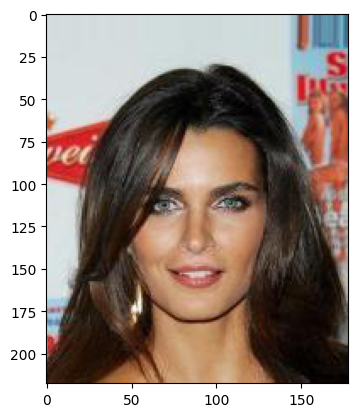

In [233]:
import matplotlib.pyplot as plt

random_image = image_dataset[0][0]
random_image_label = image_dataset[0][1]

# Print the Image using Matplotlib
plt.imshow(random_image)
print("The label of the image is:")
random_image_label

##GoogleNet

In [19]:
dataset_sizes

{'train': 5000, 'test': 10}

In [42]:
dataset_sizes['test']

1000

In [74]:
model_ft = models.googlenet(pretrained=True) # loading a pre-trained(trained on image net) resnet18 model from torchvision models
num_ftrs = model_ft.fc.in_features
print(num_ftrs)
model_ft.fc = nn.Linear(num_ftrs, 39)      # changing the last layer for this dataset by setting last layer neurons to 200 as this dataset has 200 categories

if use_gpu:                                 # if gpu is available then use it
    model_ft = model_ft.cuda()
#model_ft = model_ft.float()
#criterion = nn.CrossEntropyLoss()           # defining loss function
criterion = nn.MultiLabelSoftMarginLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.Adam(model_ft.parameters(), lr=0.0001)



/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=GoogLeNet_Weights.IMAGENET1K_V1`. You can also use `weights=GoogLeNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


1024


In [75]:
def train_model(model, criterion, optimizer, num_epochs=50):
    since = time.time()

    best_model_wts = model.state_dict()
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'test']:
            if phase == 'train':
                #scheduler.step()
                model.train(True)  # Set model to training mode
            else:
                model.train(False)  # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for data in dataloaders[phase]:
                # get the inputs
                inputs, labels = data

                # wrap them in Variable
                if use_gpu:
                    inputs = Variable(inputs.cuda())
                    labels = Variable(labels.cuda())
                else:
                    inputs, labels = Variable(inputs), Variable(labels)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                outputs = model(inputs)


                # backward + optimize only if in training phase
                if phase == 'train':
                    #_, preds = torch.max(outputs.logits, 1)
                    preds = outputs.data
                    loss = criterion(outputs.data, labels)
                    loss.backward()
                    optimizer.step()
                else:
                    #_, preds = torch.max(outputs.data, 1)
                    preds = outputs.data
                    loss = criterion(outputs, labels)

                # statistics
                running_loss += loss.data
                #running_corrects += torch.sum(preds == labels.data)
                running_corrects += torch.sum(torch.where(preds > 0, 1.0, -1.0) == labels)#(preds == labels.data)

            epoch_loss = running_loss / (dataset_sizes[phase] )#* len(class_names))
            epoch_acc = running_corrects.float() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'test' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = model.state_dict()
                state = {'model':model_ft.state_dict(),'optim':optimizer_ft.state_dict()}
                torch.save(state,'./googlenet/point_best.pth')

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best test Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [236]:
import numpy as np

def visualize_model(model, num_images=8):
    images_so_far = 0
    fig = plt.figure()


    for i, data in enumerate(dataloaders['test']):
        inputs, labels = data
        #print(labels)
        if use_gpu:
            inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())
        else:
            inputs, labels = Variable(inputs), Variable(labels)
        #print(labels)
        #_, lab = torch.max(labels.data, 1)
        outputs = model(inputs)
        #print(outputs)
        preds = outputs.data
        preds = torch.where(preds > 0, 1.0, -1.0)
        #_, preds = torch.max(outputs.logits, 1)

        #print(preds)

        for j in range(inputs.size()[0]):
            images_so_far += 1
            ax = plt.subplot(num_images//2, 2, images_so_far)
            ax.axis('off')
            #ax.set_title('class: {} predicted: {}'.format(class_names[labels.data[j]], class_names[preds[j]]))
            plt.imshow(inputs.cpu().inputs[j][0])

            if images_so_far == num_images:
                return

In [237]:
len(image_dataset.__getitem__(0)[1][0])

39

In [76]:
model_ft = train_model(model_ft, criterion, optimizer_ft,num_epochs=50)

Epoch 0/49
----------


RuntimeError: ignored

##RESNET

In [185]:
model_ft = train_model(model_ft, criterion, optimizer_ft,num_epochs=2)

Epoch 0/1
----------
phase
train


RuntimeError: ignored

In [184]:
def train_model(model, criterion, optimizer, num_epochs=50):
    since = time.time()

    best_model_wts = model.state_dict()
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'test']:
            if phase == 'train':
                #scheduler.step()
                model.train(True)  # Set model to training mode
            else:
                model.train(False)  # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0
            print("phase")
            print((phase))
            # Iterate over data.
            for data in dataloaders[phase]:
                # get the inputs
                inputs, labels = data
                '''
                print("inputs before")
                print(len(inputs))
                print("labels before")
                print(len(labels))
                '''
                inputs, labels = inputs.to(device), labels.to(device)
                '''
                print("inputs after")
                print(len(inputs))
                print("labels after")
                print(len(labels))

                print("inputs")
                print(inputs)
                print("len inputs")
                print(len(inputs))
                print("labels")
                print(labels)
                print("lenlabels")
                print(len(labels))
                '''

                # wrap them in Variable
                if use_gpu:
                    inputs = Variable(inputs.cuda())
                    labels = Variable(labels.cuda())
                else:
                    inputs, labels = Variable(inputs), Variable(labels)

                '''
                print("inputs after 2")
                print(len(inputs))
                print("labels after 2")
                print(len(labels))
                '''
                #print(inputs)
                #print(labels)
                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                outputs = model(inputs)
                '''
                print("inputs")
                print(len(inputs))
                print("outputs")
                print(len(outputs))

                print("outputs")
                print(outputs)
                print("len outputs")
                print(len(outputs))
                print("outputs.data")
                print(outputs.data)
                print("len outputs.data")
                print(len(outputs.data))
                '''
                #_, preds = torch.max(outputs.data, 1)
                preds = outputs.data
                preds = torch.where(preds > 0, 1.0, -1.0)
                '''
                print("preds")
                print(len(preds))
                print("outputs")
                print(len(outputs))
                print("labels")
                print(len(labels))

                print("preds")
                print(preds)
                print("outputs")
                print(outputs)
                print("outputs.data")
                print(outputs.data)
                print("labels")
                print(labels)
                '''
                #print("LOSS????")
                loss = criterion(outputs, labels)
                #print("LOSSSSSSSSSSSSSSS")
                # backward + optimize only if in training phase
                if phase == 'train':
                    loss.backward()
                    optimizer.step()

                # statistics
                running_loss += loss.data
                running_corrects += torch.sum(torch.where(preds > 0, 1.0, -1.0) == labels)#(preds == labels.data)

                '''
                print("preds")
                print(len(preds))
                print("labels")
                print(len(labels))
                '''

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.float() / dataset_sizes[phase]

            '''
            print("running_loss")
            print(len(running_loss))
            print("dataset_sizes[phase]")
            print(len(dataset_sizes[phase]))
            print("running_corrects")
            print(len(running_corrects))
            print("epoch_loss")
            print(len(epoch_loss))
            print("epoch_acc")
            print(len(epoch_acc))
            '''

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'test' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = model.state_dict()
                state = {'model':model_ft.state_dict(),'optim':optimizer_ft.state_dict()}
                torch.save(state,'./face_resnet_best.pth')

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best test Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [65]:
import numpy as np

def visualize_model(model, num_images=8):
    images_so_far = 0
    fig = plt.figure()


    for i, data in enumerate(dataloaders['test']):
        inputs, labels = data
        #print(labels)
        if use_gpu:
            inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())
        else:
            inputs, labels = Variable(inputs), Variable(labels)
        #print(labels)
        #_, lab = torch.max(labels.data, 1)
        outputs = model(inputs)
        #print(outputs)
        #_, preds = torch.max(outputs.data, 1)
        preds = outputs.data
        preds = torch.where(preds > 0, 1.0, -1.0)
        #print(preds)

        for j in range(inputs.size()[0]):
            images_so_far += 1
            ax = plt.subplot(num_images//2, 2, images_so_far)
            ax.axis('off')
            idx_label = (labels.data[j][0] == 1).nonzero().flatten()
            idx_label = idx_label.tolist()
            print(labels.data[j][0])
            print(type(labels.data[j][0]))
            idx_pred = (preds[j] == 1).nonzero().flatten()
            idx_pred = idx_pred.tolist()
            print(preds[j])
            print(type(preds[j]))
            classnamesarray = np.array(class_names)
            ax.set_title('class: {} predicted: {}'.format(classnamesarray[idx_label[0]], classnamesarray[idx_pred[0]]))
            plt.imshow(inputs[j][0])#inputs.cpu().data[j])

            if images_so_far == num_images:
                return

In [ ]:
visualize_model(model_ft,num_images=2)

In [ ]:
input

In [80]:
label[0][0][0]

tensor(-1)

In [98]:
len(label.data[0][0])

39

In [101]:
class_names[label.data[0][0][6]]

'Young'

In [103]:
len(class_names)

39

In [106]:
len(label.data[0][0])

39

In [123]:
label.data[0][0][1]

tensor(1)

In [130]:
idx = (label.data[0][0] == 1).nonzero().flatten()
idx.tolist()

[1, 2, 22, 23, 32, 35]

In [144]:
type(idx.tolist())

list

In [145]:
type(class_names)

list

In [149]:
type(idx.tolist()[:])

list

In [150]:
class_names[idx.tolist()[:]]

TypeError: ignored

In [152]:
import numpy as np

a = np.array(class_names)
a[idx.tolist()]

array(['Arched_Eyebrows', 'Attractive', 'Narrow_Eyes', 'No_Beard',
       'Wavy_Hair', 'Wearing_Lipstick'], dtype='<U19')

In [120]:
torch.nonzero((label.data[0][0]==1).sum(dim=0) == label.data[0][0].size(0))

tensor([], size=(0, 0), dtype=torch.int64)

In [116]:
torch.any(label.data[0][0]==1, dim=0)

tensor(True)

In [112]:
[x for x in label.data[0][0] if x not in [-1]]

[tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1)]

In [110]:
class_names[[x for x in label.data[0][0] if x not in [1]]]

TypeError: ignored

In [ ]:
#[x for x in df.columns if x not in ['id','Male']]

In [ ]:
class_names

In [180]:

use_gpu = False
device = torch.device("cpu")

In [163]:
use_gpu = True
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [165]:
model_ft = model_ft.to(device)

In [181]:
model_ft = models.resnet18(pretrained=True) # loading a pre-trained(trained on image net) resnet18 model from torchvision models
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 39)      # changing the last layer for this dataset by setting last layer neurons to 200 as this dataset has 200 categories

#if use_gpu:                                 # if gpu is available then use it
#    model_ft = model_ft.cuda()
#model_ft = model_ft.float()
criterion = nn.MultiLabelSoftMarginLoss() #BCEWithLogitsLoss()#MultiLabelSoftMarginLoss()           # defining loss function

# Observe that all parameters are being optimized
optimizer_ft = optim.Adam(model_ft.parameters(), lr=0.0001)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
dataset['test'][0][0]

In [113]:
input, label = next(iter(dataloaders['test']))

In [114]:
type(input)

torch.Tensor

In [ ]:
input[0]

In [117]:
label[0]

tensor([[-1, -1,  1, -1, -1,  1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,
          1,  1,  1, -1, -1,  1,  1, -1,  1, -1, -1, -1,  1, -1, -1,  1, -1,  1,
         -1, -1,  1]])

In [115]:
type(label)

torch.Tensor

In [112]:
#model_ft(dataset['test'][0][0])
input, label = next(iter(dataloaders['test']))
input
out = model_ft(input)

RuntimeError: ignored

In [42]:
len(input)

8

In [ ]:
input[0]

In [44]:
len(out)

8

In [61]:
torch.min(out[0])

tensor(-0.8262, grad_fn=<MinBackward1>)

In [63]:
torch.sum(torch.where(out[0] > 0, 1.0, -1.0) == label[0])

tensor(23)

In [ ]:
out.data

In [59]:
out[0]

z = out[0].clone()

z

tensor([ 0.3533,  0.0472,  0.0546, -0.7826, -0.0356, -0.0052, -0.1812, -0.5068,
        -0.7670, -0.0185, -0.2744, -0.4905,  0.9452, -0.1487,  0.2359,  0.1996,
         0.2942,  0.3825,  0.2942, -0.2086, -0.4147, -0.2093,  0.1111,  0.5885,
        -0.0314, -0.0083,  0.7543,  0.4173,  0.5340, -0.5901, -0.8246, -0.2588,
        -0.3683,  0.0519,  0.4305, -0.3993,  0.5084, -0.8262,  0.3493],
       grad_fn=<CloneBackward0>)

In [47]:
len(label)

8

In [48]:
label[0]

tensor([[-1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
         -1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  1,
         -1, -1, -1]])

In [131]:
image_dataset.__getitem__(6)

(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=178x218 at 0x7A42D1719660>,
 tensor([[-1,  1,  1, -1, -1, -1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
           1,  1,  1, -1, -1,  1, -1, -1,  1, -1,  1, -1,  1, -1,  1,  1, -1,  1,
          -1, -1,  1]]))

In [132]:
model_ft = train_model(model_ft, criterion, optimizer_ft,num_epochs=10)

Epoch 0/9
----------


RuntimeError: ignored

In [101]:
for i in range classes_size:
  print(image_dataset[i].size)

  [x for x in df.columns if x not in ['id','Male']]

SyntaxError: ignored

TypeError: ignored

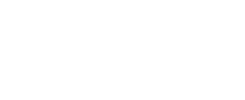